## *How can a "Machine learning model" learn from the measurements of the "iris species" to classify them?*

###  Import necessary libraries

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris


### Load the Iris dataset

In [177]:
iris = load_iris()
# Convert to Pandas DataFrame for easier inspection
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [178]:
# Add the target (species) to the DataFrame
iris_df['species'] = iris.target
iris_df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## *Data Exploration:*

#### Pair Plot: All Features

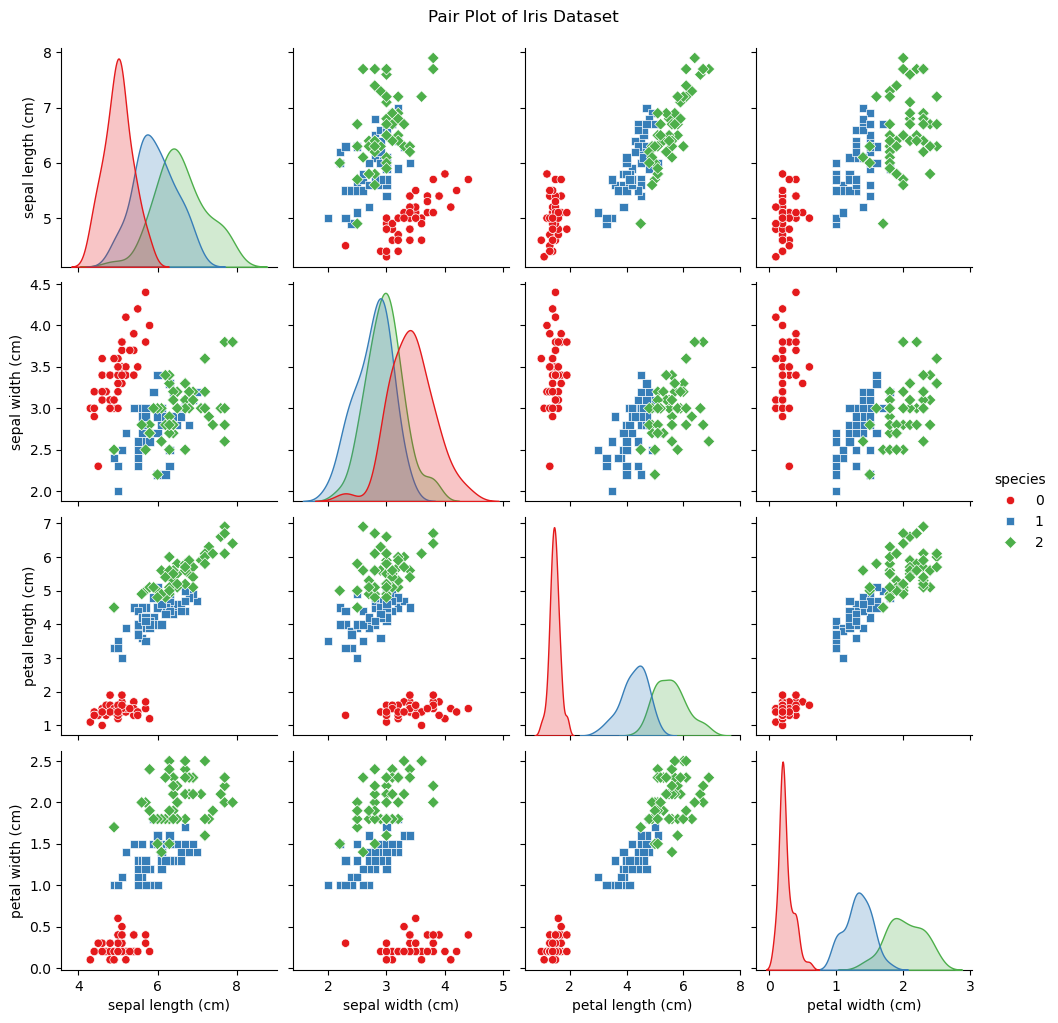

In [179]:
sns.pairplot(iris_df, hue='species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

#### **Get information about the dataset (check for missing values, data types)**

In [180]:
print("\nDataset Info:")
print(iris_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


#### **Get descriptive statistics (mean, min, max, etc.)**

In [181]:
print("\nDescriptive Statistics:")
print(iris_df.describe())


Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


#### **Check for missing values**

In [182]:
print("\nMissing Values:")
print(iris_df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


#### **View the distribution of target classes (species)**

In [183]:
print("\nClass Distribution (Species):")
print(iris_df['species'].value_counts())


Class Distribution (Species):
species
0    50
1    50
2    50
Name: count, dtype: int64


In [184]:
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target # Labels: 0 for setosa, 1 for versicolor, 2 for virginica


## Split the dataset into training and testing sets


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Train the model (using Logistic Regression model)

In [186]:
# Note: multi_class='multinomial' for multi-class classification
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

*Fit the model to the training data*

In [187]:
log_reg .fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

### *Predict on the test set*

In [188]:
y_pred = log_reg.predict(X_test)

### *Calculate accuracy*

In [189]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Test set accuracy: {accuracy:.2f}")

Test set accuracy: 100.00


### *Cross-Validation*

In [190]:
cross_val_score(log_reg, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-Valodation Accuracy: {np.mean(cv_scores):2f}')

Cross-Valodation Accuracy: 0.935619


### *Classification Report*

In [191]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### *Confusion Matrix*

In [192]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Conclusion

### The confusion matrix shows that the model accurately classified all iris species, with no misclassifications. 
- Cross-validation accuracy of 93.56% and perfect test set accuracy of 100% indicate the model's robustness and effectiveness in learning from measurements.
- Overall, these results demonstrate the model's strong capability in distinguishing between Setosa, Versicolor, and Virginica species.